<a href="https://colab.research.google.com/github/zenaiev/hep/blob/main/cms_od_ttbar/cms_od_ttbar_postanalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install gsl (needed for ROOT libMathMore.so library)

In [1]:
!apt-get update
!apt-get install -y libgsl-dev

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,613 kB]
Get:13 https://r2u.stat.illinois.edu/u

Install ROOT

In [2]:
!wget https://root.cern/download/root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
!tar -xzf root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
import os
pwd = os.getcwd()
os.environ['ROOTSYS'] = pwd + '/root'
os.environ['PATH'] += ':' + pwd + '/root/bin'
os.environ['LD_LIBRARY_PATH'] += ':' + pwd + '/root/lib'
import sys
sys.path.append(pwd + '/root/lib')
#import ROOT
#print(ROOT.__version__)

--2024-11-21 01:01:47--  https://root.cern/download/root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300006880 (286M) [application/x-gzip]
Saving to: ‘root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz’

root_v6.32.04.Linux 100%[===================>] 286.11M  14.6MB/s    in 22s     

2024-11-21 01:02:10 (12.8 MB/s) - ‘root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz’ saved [300006880/300006880]



Clone repository, compile PostAnalyzer

In [3]:
!git clone https://github.com/zenaiev/2011-ttbar
os.chdir('2011-ttbar/PostAnalyzer')
!git checkout 2024
!./compile.sh

Cloning into '2011-ttbar'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 254 (delta 16), reused 29 (delta 11), pack-reused 214 (from 1)
Receiving objects: 100% (254/254), 1.35 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Branch '2024' set up to track remote branch '2024' from 'origin'.
Switched to a new branch '2024'


Download data (output of Analyzer)

In [4]:
!wget https://cernbox.cern.ch/s/UmbXF1XxVrT4whQ/download

--2024-11-21 01:02:27--  https://cernbox.cern.ch/s/UmbXF1XxVrT4whQ/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.53.35, 128.142.53.28, 137.138.120.151, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.53.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘download’

download                [    <=>             ]   2.62G  13.4MB/s    in 2m 10s  

2024-11-21 01:04:39 (20.7 MB/s) - ‘download’ saved [2815334400]



Extract data and create needed links

In [5]:
!tar xvpf download
!ls
!ln -s UmbXF1XxVrT4whQ/MERGED/ntuples-data ./
!ln -s UmbXF1XxVrT4whQ/MERGED/ntuples-mc ./

UmbXF1XxVrT4whQ
UmbXF1XxVrT4whQ/MERGED
UmbXF1XxVrT4whQ/MERGED/ntuples-data
UmbXF1XxVrT4whQ/MERGED/ntuples-data/DoubleElectron
UmbXF1XxVrT4whQ/MERGED/ntuples-data/DoubleElectron/ttbarSel_merged.root
UmbXF1XxVrT4whQ/MERGED/ntuples-data/DoubleMu
UmbXF1XxVrT4whQ/MERGED/ntuples-data/DoubleMu/ttbarSel_merged.root
UmbXF1XxVrT4whQ/MERGED/ntuples-data/MuEG
UmbXF1XxVrT4whQ/MERGED/ntuples-data/MuEG/ttbarSel_merged.root
UmbXF1XxVrT4whQ/MERGED/ntuples-mc
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/DYJetsToLL_M-10To50_TuneZ2_7TeV-pythia6
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/DYJetsToLL_M-10To50_TuneZ2_7TeV-pythia6/ttbarSel_merged.root
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/DYJetsToLL_TuneZ2_M-50_7TeV-madgraph-tauola
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/DYJetsToLL_TuneZ2_M-50_7TeV-madgraph-tauola/ttbarSel_merged.root
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/TTJets_TuneZ2_7TeV-madgraph-tauola
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/TTJets_TuneZ2_7TeV-madgraph-tauola/00000
UmbXF1XxVrT4whQ/MERGED/ntuples-mc/TTJets_TuneZ2_7TeV-madgraph-ta

Run selection and plotting scripts

In [6]:
!./ttbarMakeHist
!./ttbarMakePlots

****** EVENTRECO ******
input sample: data
type: 1   channel: 1
nEvents: 954351
nSel  : 1833
nReco : 1019
****** EVENTRECO ******
input sample: mcSigReco
type: 2   channel: 1
nEvents: 3081748
nSel  : 144480
nReco : 98668
nGen  : 678331
C = 14.55% (no KINRECO 21.30%)
****** EVENTRECO ******
input sample: mcSigOtherReco
type: 3   channel: 1
nEvents: 3081748
nSel  : 48803
nReco : 34717
****** EVENTRECO ******
input sample: mcSigGen
type: 2   channel: 1
nEvents: 3081748
nSel  : 0
nReco : 0
nGen  : 678331
C = 0.00% (no KINRECO 0.00%)
****** EVENTRECO ******
input sample: mcSingleTopReco
type: 4   channel: 1
nEvents: 50626
nSel  : 2760
nReco : 1233
****** EVENTRECO ******
input sample: mcWjetsReco
type: 4   channel: 1
nEvents: 14291
nSel  : 256
nReco : 64
****** EVENTRECO ******
input sample: mcDYlmReco
type: 4   channel: 1
nEvents: 36812
nSel  : 34
nReco : 19
****** EVENTRECO ******
input sample: mcDYhmReco
type: 4   channel: 1
nEvents: 9887526
nSel  : 1386
nReco : 724
****** EVENTRECO ****

View plots

compile.sh   hist	ntuples-data  README.txt   ttbarMakeHist       UmbXF1XxVrT4whQ
data	     hist-REF	ntuples-mc    selection.h  ttbarMakeHist.cxx
download     kinReco.h	plots	      settings.h   ttbarMakePlots
eventReco.h  mc		plots.h       tree.h	   ttbarMakePlots.cxx


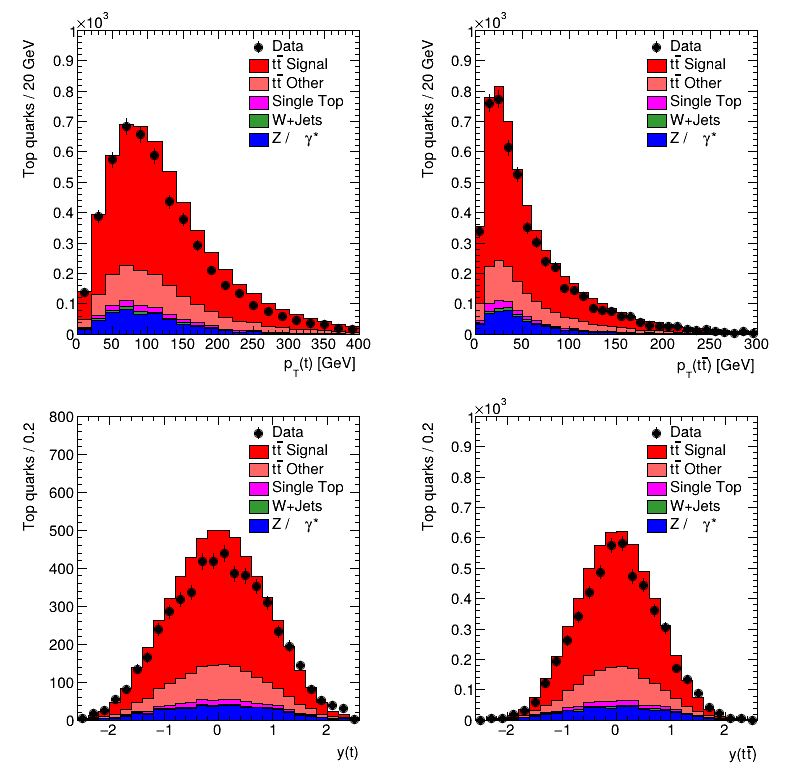

In [7]:
!ls
from IPython.display import Image
Image('plots/cp.png')

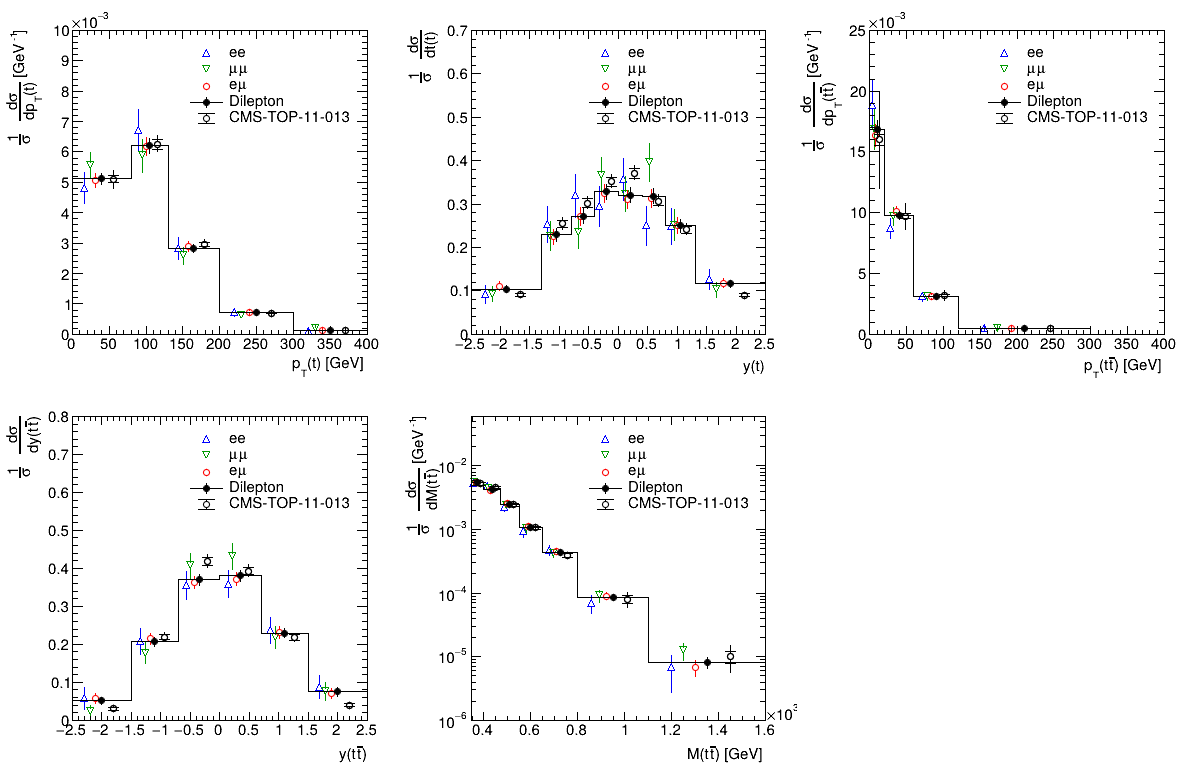

In [8]:
Image('plots/cs_norm.png')